# Analyze feed-forward network predictions of female walking from song

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from disp import set_plot


LOOKBACK = 1800
DATA_DIR = f'data/simple/torch/ff/lookback_{LOOKBACK}'

FNAMES = sorted([fname for fname in os.listdir(DATA_DIR) if fname.endswith('.npy')])
PATHS = [os.path.join(DATA_DIR, fname) for fname in FNAMES]

In [7]:
datas = [np.load(path, allow_pickle=True)[0] for path in PATHS]
r2_mns = []
r2_sems = []
hparam_strs = []

for data in datas:
    r2_mns.append(data['r2_bests'].mean())
    r2_sems.append(data['r2_bests'].std()/np.sqrt(30))
    
    hparam_str = f'NLAYER_{data["NLAYER"]}_NHIDDEN_{data["NHIDDEN"]}_LR_{data["LR"]}'
    hparam_strs.append(hparam_str)
    
idx_best = np.argmax(r2_mns)

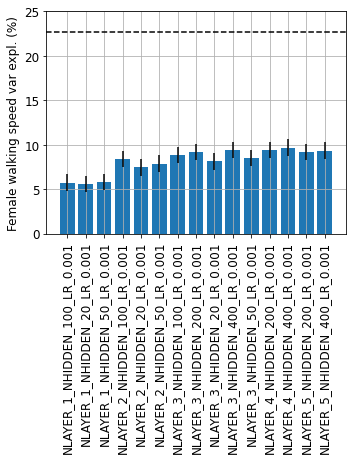

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6.5), tight_layout=True)
ax.bar(np.arange(len(datas)), 100*np.array(r2_mns), yerr=100*np.array(r2_sems))
x_ticks = np.arange(len(datas))
ax.set_xticks(x_ticks)
ax.set_xticklabels(hparam_strs, rotation=90)

ax.axhline(22.678787, c='k', ls='--')

set_plot(ax, y_lim=(0, 25), y_label='Female walking speed var expl. (%)')
ax.grid()

fig.savefig('supp/s19_hparam_sweep_ff.svg')

In [ ]:
print(np.max(r2_mns))

0.09690743883450827
